In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#loading the data
F_data= pd.read_csv('Fraud_check.csv')
F_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
#creating a new feature for fraud if 
#taxable_income <= 30000 then putting that person in "Risky" category and others are "Good" category.

#the below code is finding good and risky category it can be done with replace function also.
x = F_data['Taxable.Income']
def risky(x):
    status=[]
    for i in x:
        if i<=30000:
            status.append('risky')
        elif i >30000:
            status.append('Good') 
    return status

fraud_status = pd.DataFrame(risky(x),columns=['status'])
fraud_status

,status
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [8]:
#combining the Status column to the dataframe.
F_data['Status']= fraud_status

In [9]:
F_data.Status.value_counts()

Good     476
risky    124
Name: Status, dtype: int64

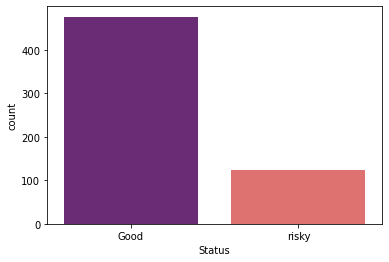

In [10]:
sns.countplot(F_data['Status'],palette='magma');

In [11]:
#splitting the dataset and using label encoder to transform the object datatype to numeric datatype
le= LabelEncoder()
X= F_data.iloc[:,0:6]
Y= F_data.iloc[:,6]
X['Undergrad'] = le.fit_transform(X['Undergrad'])
X['Marital.Status'] = le.fit_transform(X['Marital.Status'])
X['Urban'] = le.fit_transform(X['Urban'])


In [26]:
X.drop('Taxable.Income',axis=1,inplace=True)

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=45)

# Building a model on the basis of entropy

In [56]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [57]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

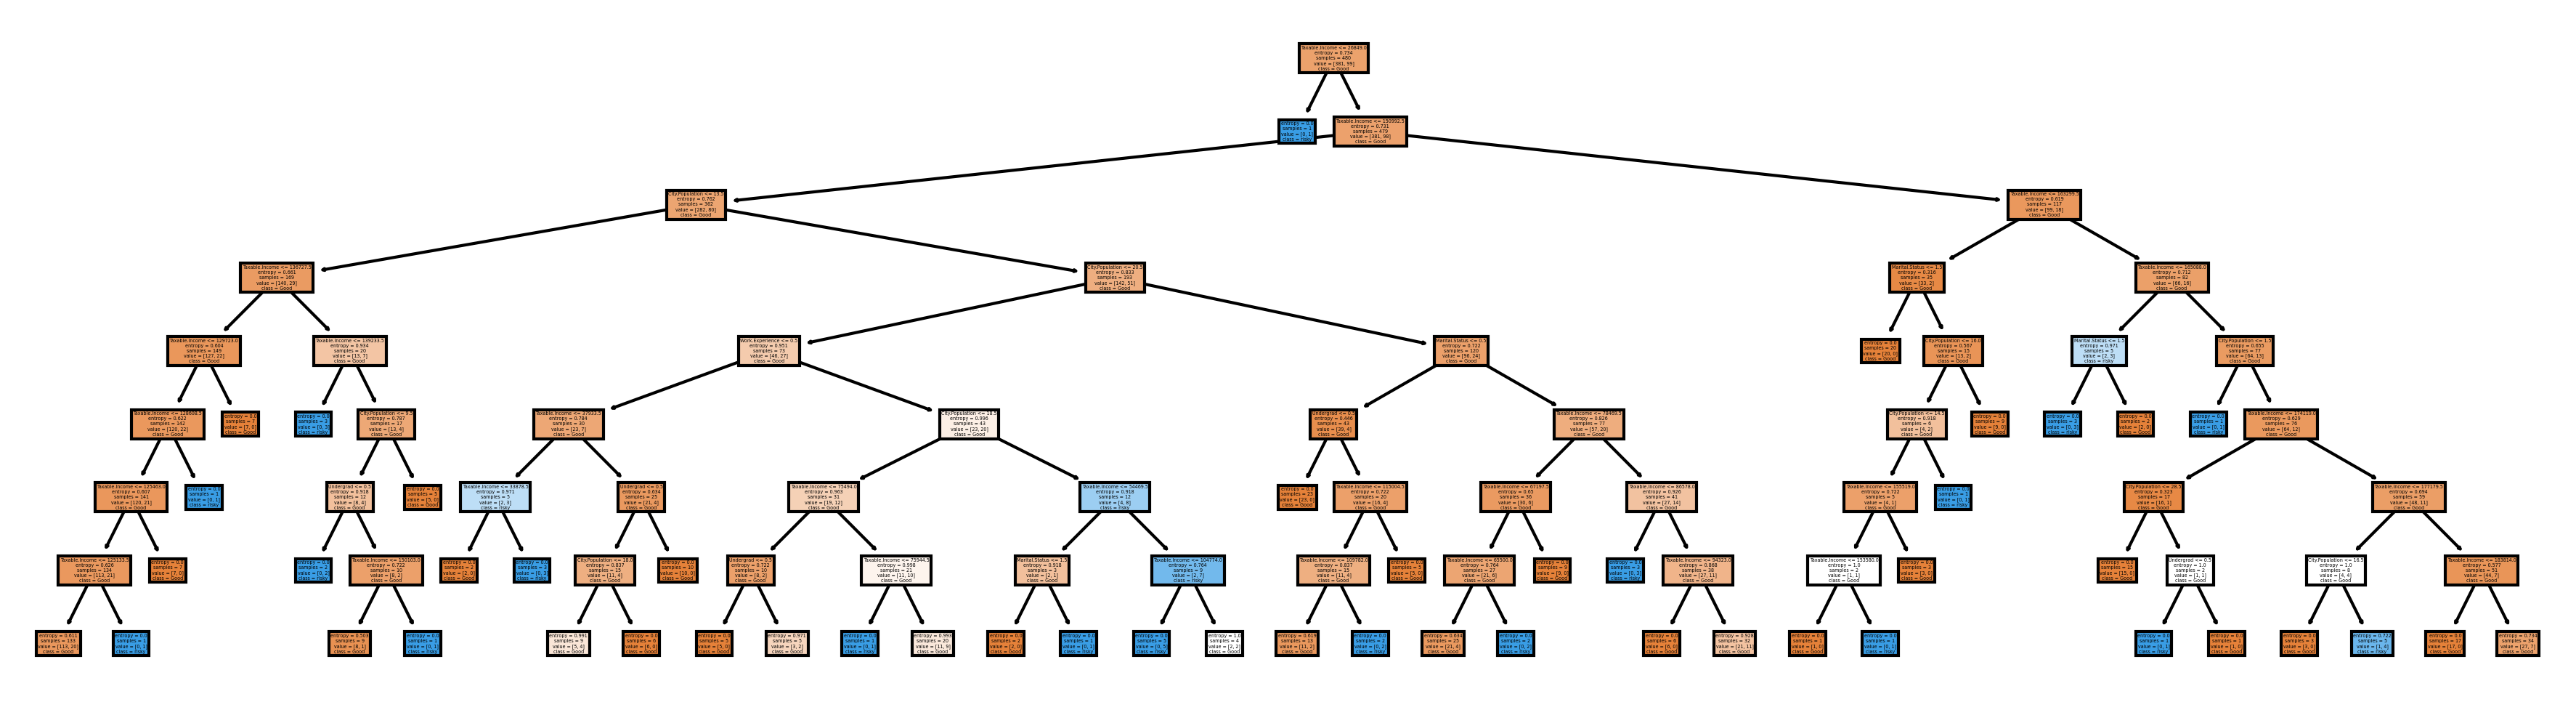

In [149]:
#visualizing the tree
features=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
classes=['Good','risky']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,4), dpi=300)
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True);

In [59]:
#predicting on training data
pred_on_train_data=model.predict(X_train)

In [60]:
# getting the count of each category 
pd.Series(pred_on_train_data).value_counts()

Good     442
risky     38
dtype: int64

In [61]:
pd.crosstab(Y_train,pred_on_train_data)

col_0,Good,risky
Status,,
Good,380,1
risky,62,37


In [62]:
np.mean(pred_on_train_data==Y_train)

0.86875

<font color= blue>The model is predicting 86% accurately on trianing data.</font>

In [63]:
#testing on test data
pred_on_test_data=model.predict(X_test)
pd.Series(pred_on_test_data).value_counts()

Good     110
risky     10
dtype: int64

In [64]:
pd.crosstab(Y_test,pred_on_test_data)

col_0,Good,risky
Status,,
Good,86,9
risky,24,1


In [65]:
np.mean(Y_test==pred_on_test_data)

0.725

<font color= blue>The model is predicting 72% accurately on test data.</font>

# Building a model using Gini index

In [123]:
model1= DecisionTreeClassifier(criterion='gini',max_depth=6)

In [124]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6)

In [125]:
preds=model1.predict(X_test)

In [126]:
pd.Series(preds).value_counts()

Good     116
risky      4
dtype: int64

In [127]:
pd.crosstab(Y_test,preds)

col_0,Good,risky
Status,,
Good,92,3
risky,24,1


In [128]:
np.mean(Y_test==preds)

0.775

In [129]:
preds1=model1.predict(X_train)
pd.Series(preds1).value_counts()

Good     465
risky     15
dtype: int64

In [130]:
pd.crosstab(preds1,Y_train)

Status,Good,risky
row_0,,
Good,380,85
risky,1,14


In [131]:
np.mean(preds1==Y_train)

0.8208333333333333

><font color= blue>The model is predicting 82% accurately on train data.</font>

><font color= blue>The model is predicting 77% accurately on test data.</font>

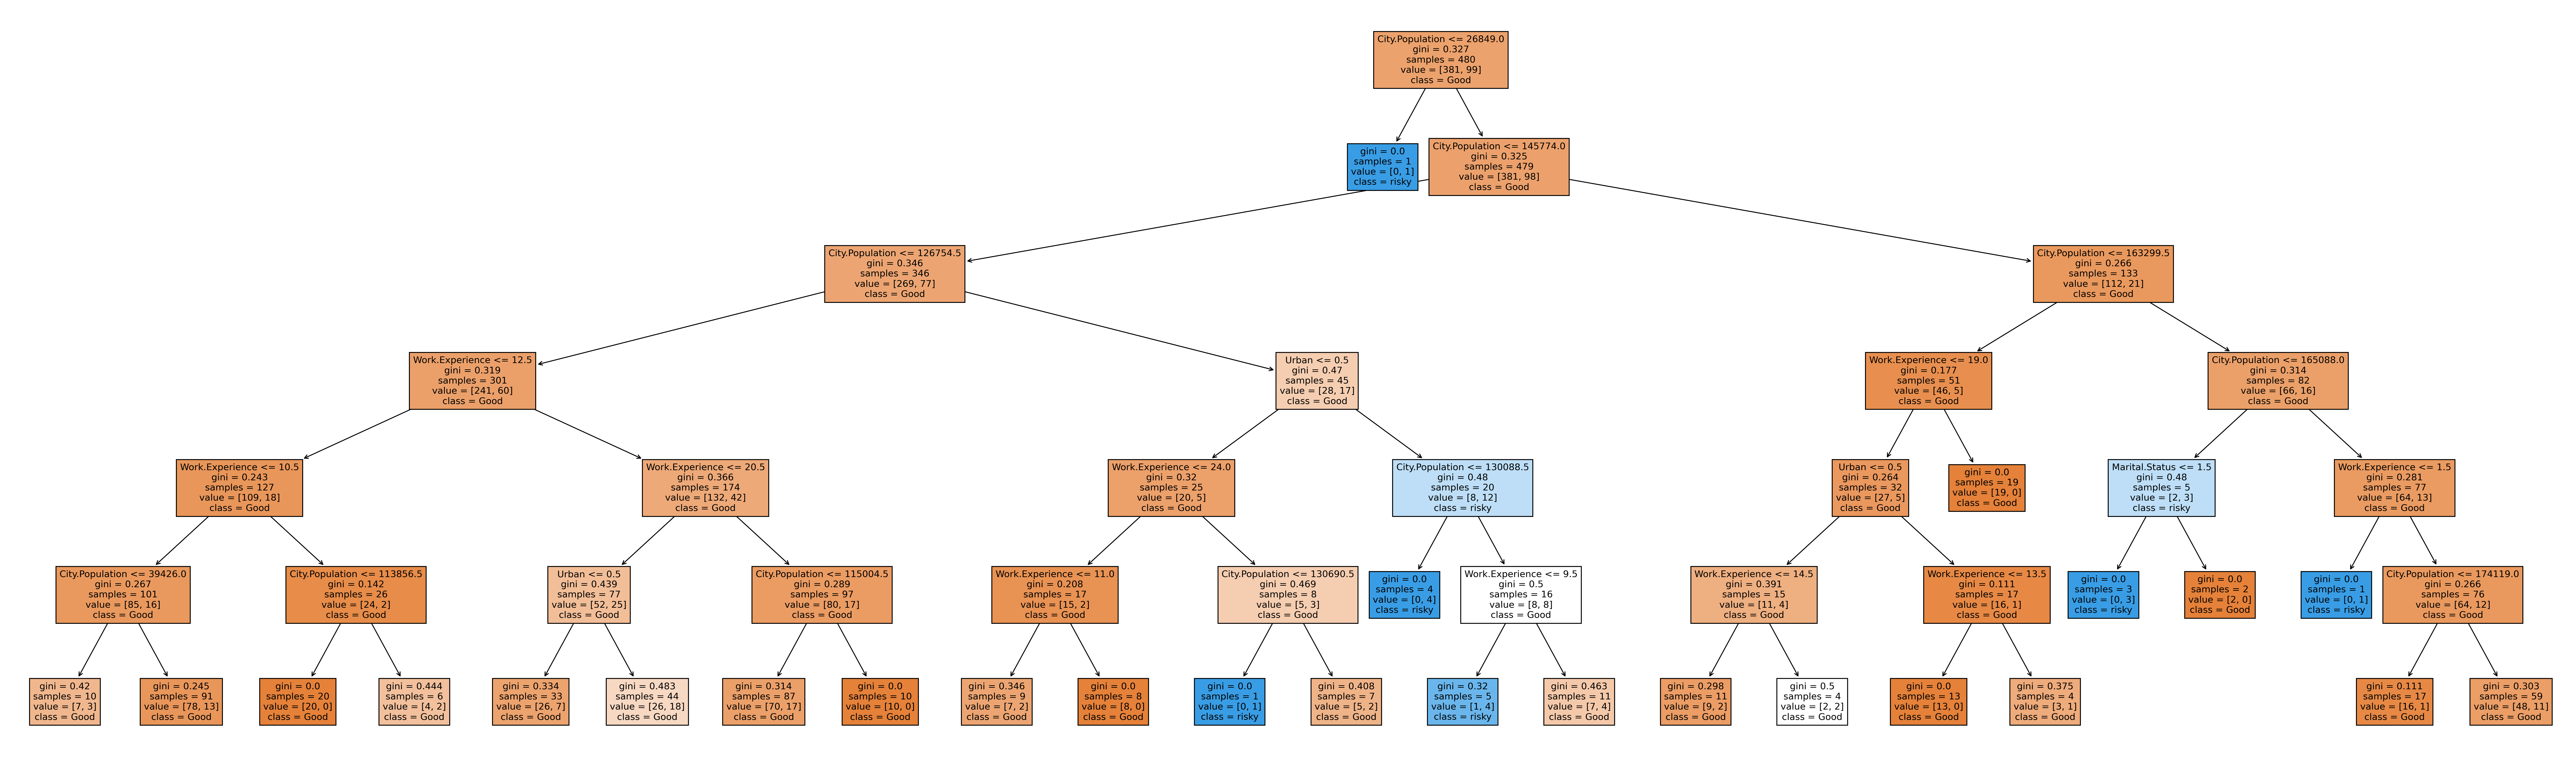

In [148]:
#visualizing the tree
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,15), dpi=300)
tree.plot_tree(model1,filled=True,feature_names=X_train.columns,class_names=Y_train.unique(),fontsize=10);